## 线性模型的正则化

### 准备数据

准备20组带有噪音的线性数据：$y=1+0.5x$

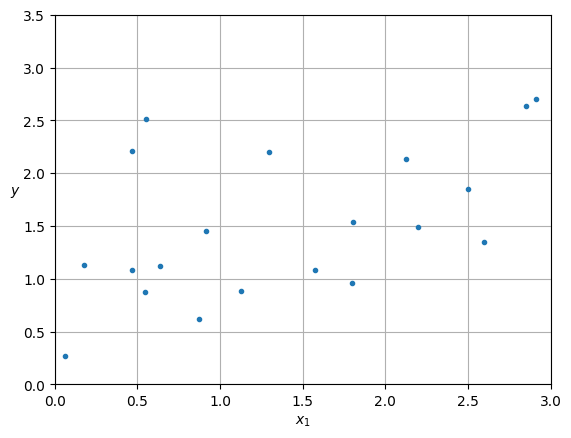

In [23]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

plt.figure()
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

### 岭回归

岭回归的损失函数是：

$$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n}\theta_i^2$$

对于线性回归的岭回归，我们可以使用封闭方程去计算，也可以使用梯度下降去计算。

岭回归的封闭方程的解如下：

$$\hat{\theta}=(X^T \cdot X + \alpha A)^{-1} \cdot X^T \cdot y$$

下面使用`Scikit-Learn`提供的`Ridge`来进行封闭方程的岭回归求解。其中，`cholesky`表示使用`Cholesky`法进行矩阵分解对上面的公式进行变形。

In [24]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

同样的，我们可以用`Scikit-Learn`提供随机梯度下降算法`SGDRegressor`实现岭回归。其中，`penalty`参数指的是正则项的惩罚类型。指定`l2`表明要在损失函数上添加一项：权重向量 $ \ell^2 $ 番薯平方的一半，即简单的岭回归。

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

array([[1.55325833]])

下面的代码展示了在相同线性数据上使用不同的 $\alpha$ 值的岭回归模型。左图使用了简单的岭回归模型。右图首先使用10阶的`PolynomialFeatures`对数据集进行转换，然后使用`StandardScaler`进行特征缩放，最后将岭模型应用在处理后的特征上。这就是带有岭正则项的多项式回归。

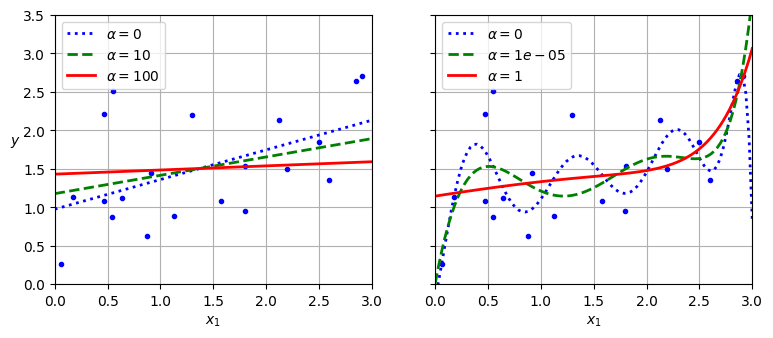

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()
